## **Download the Dataset**

In [26]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

In [27]:
import tensorflow as tf

In [28]:
dataset = tf.keras.utils.get_file(
                'aclImdb_v1', 
                 url,
                 untar=True, # how it should be openning
                 cache_dir='.', # working directory and dataset must be same path
                 cache_subdir='') # to save subdir

In [29]:
import os
dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [30]:
os.listdir(dataset_dir) # files in the dataset


['imdbEr.txt', 'imdb.vocab', 'train', 'test', 'README']

In [31]:
train_dir = os.path.join(dataset_dir, 'train')
os.listdir(train_dir)

['neg',
 'unsupBow.feat',
 'pos',
 'urls_unsup.txt',
 'urls_pos.txt',
 'urls_neg.txt',
 'labeledBow.feat',
 'unsup']

In [32]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt')
with open(sample_file) as f:
    print(f.read())
    # sample command with positive label

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [33]:
import shutil
remove_dir = os.path.join(train_dir,'unsup') # removed unsup file
shutil.rmtree(remove_dir)
#We need two files which name is class A and class B 

## **Loading Dataset**

In [34]:
batch_size = 32 # groupping number info
seed = 42 #Must be same in the random chosen data
raw_train_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='training', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [35]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
   print("Review", text_batch.numpy()[i])
   print("Label", label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [36]:
print("Label 0 corresponds to", raw_train_ds.class_names[0])
print("Label 1 corresponds to", raw_train_ds.class_names[1])

Label 0 corresponds to neg
Label 1 corresponds to pos


In [37]:
raw_val_ds = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size, 
    validation_split=0.2, 
    subset='validation', 
    seed=seed)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [38]:
test_dir = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/test', 
     batch_size=batch_size)

Found 25000 files belonging to 2 classes.


## **Data Preprocessing**

In [39]:
import re
import string
def custom_standardization(input_data):
    # Büyük karakterleri küçük karakterlere dönüştürme
    lowercase = tf.strings.lower(input_data)
    # HTML tag kaldırma 
    stripped_html = tf.strings.regex_replace(lowercase,'<br />',' ')
    # HMTL tagları ve noktalama işaretlerini kaldır 
    return tf.strings.regex_replace(stripped_html,'[%s]' % 
                re.escape(string.punctuation), '')

In [40]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
max_features = 10000
sequence_length = 250
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [41]:
#train_text is include only text
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

In [42]:
def vectorize_text(text,label):
  text = tf.expand_dims(text,-1)
  return vectorize_layer(text),label

In [43]:
text_batch,label_batch = next(iter(raw_train_ds))

In [44]:
first_review, first_label = text_batch[0],label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

In [45]:
print("128 --->", vectorize_layer.get_vocabulary()[128])
print("1312 -->", vectorize_layer.get_vocabulary()[1312])
print("Vocabulary size: {} ".format(len(vectorize_layer.get_vocabulary())))

128 ---> here
1312 --> thus
Vocabulary size: 10000 


In [46]:
train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = test_dir.map(vectorize_text)

## **Configure the Dataset for Performance**
Girdi ve çıktıların birbirlerini engellemediğinden emin olmak için 2 method kullanılır.
 cache methodu verileri diskten yükledikten sonra bellekte tutar. 
 Eğitim esnasında veri setinin dar boğaza gelmesini engeller.
 verisetimiz belleğe sığmayacak kadar büyükse verilerin küçük dosyalar halinde okunması için kkullanılabilir.

prefetch methodu: eğitim esnasında veri ön işlemeyi ve model uygulamayı beraber yapar.
 bu methodda kullanılan bileşenlerin sayısı, tek br eğitim adımında kullanılan batch sayısıyla eşit olmalıdır.
 Bunun otomatik yapılması için başka metot kullanılır

In [47]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)


## **Creating the Model**

metin verilerini sinir ağlarında kullanmak için  embeding katmanı kullanılır
ilk katmana embeding katmanını yazdık. Bu katman tamsayıyla kodlanmış metinleri alır 
ve bu vektörler model eğitilirken öğrenir. Bu layer argüman olarak girdi kelime sayısını alır
ve diğer argüman olarak çıktı boyutunu aldı, embedding_dim
Regularleşitmre için Dropout methodu kullanıldı. Çıktıların yüzde yirmisinin silinmesi için Dropout(0.2) yazdık.
 Bir sonraki katman GlobalAveragePooling1D, bu katman dizi boyutnun ortalamasını alarak her bir örnek için sabit uzunlukta çıktı vektörü
 döndürür. Daha sonra bu sabit uzunluklu birimler Dense katmanına aktarılır


In [67]:

embedding_dim = 16
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(max_features +1,embedding_dim),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(1)

])

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_2 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
________________________________________________

10.000 girişimiz var 16 çıkışımız var. Çarptığımızda 1600  parametreyi elde ederiz.. İlk katmanda 16 bias olacağaı için topladığımızda 160016 parametre elde ederiz
En son katmanda 16 tane bir önceki layerdan çıktı geldiği için ve bias olduğu için son katmanda 17 tane parmetre oluşur.Hepsini topladığımızda 160,033 olur

## **Compiling the Model**
modeli eğitmek için bir loss fonksiyonuna ve optimize ediciye ihtiyaç vardır. İkili sınıflandırma problemidi,r ilgilendiğimiz problem
true yazdık çünkü aktivasyon fonk kullanmadık

In [50]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = "adam",
              metrics = tf.metrics.BinaryAccuracy(threshold=0.0)) 


## **Training the Model**

In [51]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
625/625 [==============================] - 12s 17ms/step - loss: 0.6636 - binary_accuracy: 0.6989 - val_loss: 0.6150 - val_binary_accuracy: 0.7750
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5494 - binary_accuracy: 0.8006 - val_loss: 0.4995 - val_binary_accuracy: 0.8214
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.4462 - binary_accuracy: 0.8446 - val_loss: 0.4211 - val_binary_accuracy: 0.8466
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3796 - binary_accuracy: 0.8658 - val_loss: 0.3746 - val_binary_accuracy: 0.8604
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3361 - binary_accuracy: 0.8791 - val_loss: 0.3454 - val_binary_accuracy: 0.8680
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.3056 - binary_accuracy: 0.8885 - val_loss: 0.3262 - val_binary_accuracy: 0.8714
Epoch 7/10
625/625 [==============================] - 6s 9ms/

## **Evaluating the Model**

In [52]:
loss,accuracy = model.evaluate(test_ds)
print("loss: ", loss)
print("Accuracy: ", accuracy)

782/782 [==============================] - 10s 13ms/step - loss: 0.3107 - binary_accuracy: 0.8730
loss:  0.31065958738327026
Accuracy:  0.8730000257492065


## **Plot of Accuracy and Loss**

In [53]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [54]:
import matplotlib.pyplot as plt
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

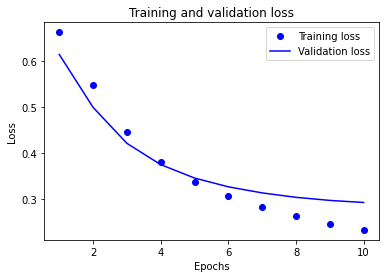

In [55]:
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,"bo",label = "Training loss")
plt.plot(epochs,val_loss,"b",label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

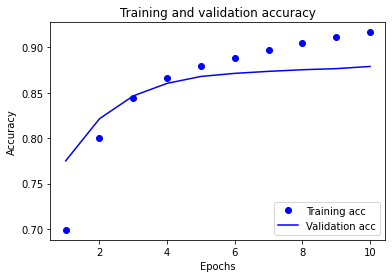

In [57]:
plt.plot(epochs,acc,"bo",label = "Training acc")
plt.plot(epochs,val_acc,"b",label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()

Eğitim verileri üzerinde modelin doğruluğu validasyon verilerinden daha fazla. Bu modelin ezberlediği anlamına gelir. yani model eğitim verilerini iyi tahmin ederken, validasyon verilerini iyi tahmin edemiyor. Bunları önlemek için, erken durdurma veya regüleştirme teknikleri kullanılabilir. 

## **Exporting the Model**

In [60]:
from tensorflow.python.ops.gen_math_ops import sigmoid
# modelin satır metinlerini işlemesi için, eğititiğimiz ağırlıklarıkullanarak text_vector ile yeni model kururcaz.

export_model = tf.keras.Sequential([
                                    vectorize_layer,
                                    model,
                                    tf.keras.layers.Activation(sigmoid)

])

In [62]:
export_model.compile(loss =tf.keras.losses.BinaryCrossentropy(from_logits=False),
                                    optimizer = "adam",
                                    metrics=["accuracy"])



In [64]:
loss,accuracy = export_model.evaluate(test_dir)
print(accuracy)

782/782 [==============================] - 13s 16ms/step - loss: 0.3107 - accuracy: 0.8730
0.8730000257492065


## **Predict New Data**

In [65]:
examples = [
            "the movie was perfect",
            "the movie was okay",
            "the movie was awful"
]

In [66]:
export_model.predict(examples)

array([[0.598078  ],
       [0.4200023 ],
       [0.30357268]], dtype=float32)